# Importing Liberaries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Cleaning

In [2]:
df = pd.read_csv('customer_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
11/7043 *100

0.1561834445548772

In [8]:
df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

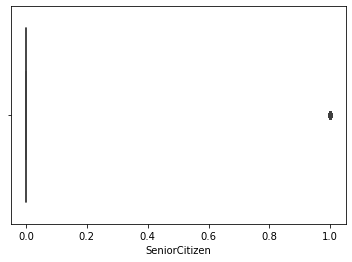

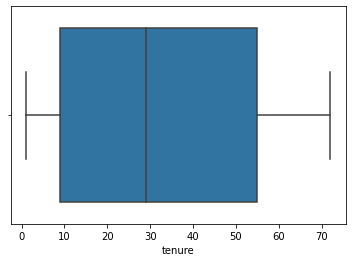

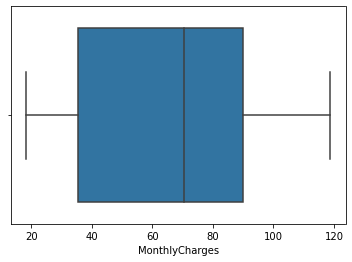

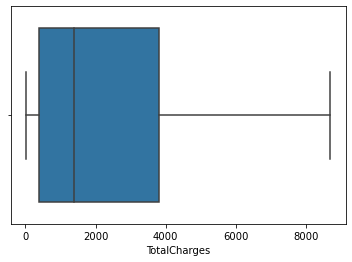

In [12]:
# Checking for Outliers
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(data=df, x=col)
        plt.xlabel(col)
        plt.show()

## Encoding

In [13]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col] = le.fit_transform(df[col])

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [15]:
df.drop('customerID', axis=1, inplace=True)

### Correalation

<AxesSubplot:>

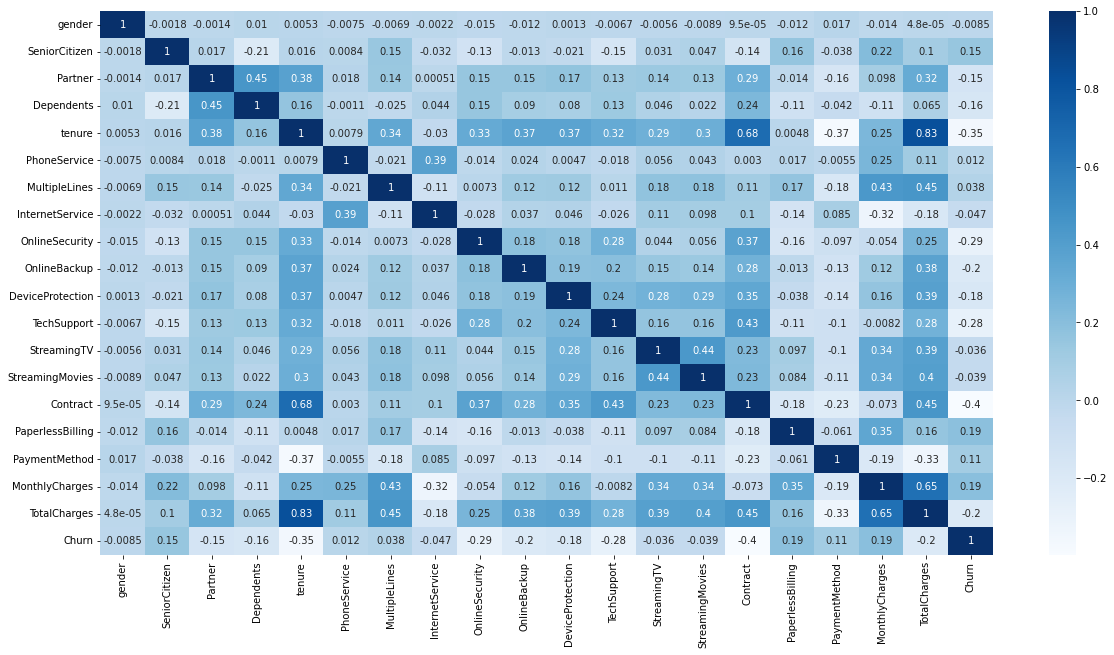

In [16]:
df.corr()
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [17]:
df.drop('TotalCharges', axis=1, inplace=True)
df.drop('tenure', axis=1, inplace=True)

### Checking Multiple Correalation

In [18]:
x = df.drop('Churn', axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [19]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [20]:
vif_data = pd.DataFrame()
vif_data['Columns'] = x.columns
vif_data['VIF Value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Columns,VIF Value
0,gender,1.922487
1,SeniorCitizen,1.362225
2,Partner,2.702327
3,Dependents,1.943514
4,PhoneService,14.169896
5,MultipleLines,2.637586
6,InternetService,4.314662
7,OnlineSecurity,2.206466
8,OnlineBackup,2.335457
9,DeviceProtection,2.594375


In [21]:
x.drop('MonthlyCharges', axis=1, inplace=True)

vif_data = pd.DataFrame()
vif_data['Columns'] = x.columns
vif_data['VIF Value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Columns,VIF Value
0,gender,1.918523
1,SeniorCitizen,1.332819
2,Partner,2.687435
3,Dependents,1.936693
4,PhoneService,7.828462
5,MultipleLines,2.216509
6,InternetService,3.072444
7,OnlineSecurity,2.205921
8,OnlineBackup,2.299378
9,DeviceProtection,2.546696


In [22]:
x.drop('PhoneService', axis=1, inplace=True)

vif_data = pd.DataFrame()
vif_data['Columns'] = x.columns
vif_data['VIF Value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Columns,VIF Value
0,gender,1.864003
1,SeniorCitizen,1.324977
2,Partner,2.662983
3,Dependents,1.933842
4,MultipleLines,2.174970
5,InternetService,2.328254
6,OnlineSecurity,2.158788
7,OnlineBackup,2.277208
8,DeviceProtection,2.537876
9,TechSupport,2.348584


In [23]:
x

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3


In [24]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

# Model Building

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=100)

### Logistic Regression

In [26]:
lo_model = LogisticRegression()

lo_model.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred_lo = lo_model.predict(x_test)
y_pred_lo

array([1, 1, 0, ..., 0, 0, 0])

In [28]:
accuracy_score(y_test, y_pred_lo)

0.7639362912400455

### Decision Tree

In [29]:
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
accuracy_score(y_test,y_pred_dt)

0.7047781569965871

### Random Forest

In [32]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
accuracy_score(y_test, y_pred_rf)

0.7400455062571104